In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

<h1><center> Stroke Prediction </center></h1> 
<h5><center> Author: Vasil Kichukov </center></h5> 

## Abstract ##
Stroke remains one of the leading causes of death and disability in Europe, with the problem expected to worsen as the population ages. Stroke is, fortunately, highly preventable and manageable if we improve our understanding of the risk level. As a result, the current study aims to develop a workable model that could be used in stroke prevention solely based on basic patient information such as age, smoking status, or BMI. In this notebook, I will analyze data from people who have undergone stroke testing.

## Introduction ##

Stroke remains one of the leading causes of death and disability in Europe, and projections show that the burden of stroke will not decrease in the next decade or beyond if nothing changes. One important factor is that the number of older people in Europe is increasing, with a projected 35% increase between 2017 and 2050.  Fortunately, there is compelling evidence that stroke is highly preventable, treatable, and manageable, and that there is significant potential to significantly reduce the burden of stroke and its long-term consequences.

To reduce the burden of stroke in the population, modifiable risk factors must be identified, as well as the efficacy of risk reduction efforts demonstrated. The risk factors include both modifiable (e.g., diet and comorbid conditions) and non-modifiable risk factors (eg, age, race). Furthermore, risk factors can be classified as short-term risks or triggers (for example, infectious events, sepsis, and stress), intermediate-term risk factors (for example, hypertension and hyperlipidemia), and long-term risk factors for stroke (eg, sex and race). For example, it is established that rural residence is associated with an increased rate of stroke and mortality after controlling for demographics, socioeconomic factors, health behaviors, traditional cardiovascular risk factors, and comorbid conditions.

Also the principal findings of a study on the risk of recurrent stroke showed that (1) the cumulative 10-year risk of a first recurrent stroke was ≈40%; (2) after the first year after first-ever stroke, the average annual risk of recurrent stroke was ≈4%; (3) ≈40% of recurrent stroke events were fatal within 30 days, which is nearly twice the 30-day case fatality of a first-ever stroke; (4) about one seventh of 10-year survivors of first-ever stroke require institutional care; and (5) almost one half of 10-year survivors of stroke are disabled.


## Dataset Representation ## 

The current study's goal is to create a usable model that predicts stroke risk based on basic information such as the patient's marital status or smoking status. Therefore the chosen data set is used to predict whether an individual is likely to have a stroke based on the following parameters and relevant information:

0) id: unique identifier

1) gender: "Male", "Female" or "Other"

2) age: age of the patient

3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

4) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

5) ever_married: "No" or "Yes"

6) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

7) Residence_type: "Rural" or "Urban"

8) avg_glucose_level: average glucose level in blood

9) bmi: Body Mass Index

10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

11) stroke: 1 if the patient had a stroke or 0 if not

## Reading, Tidying and Cleaning data

In [2]:
stroke_data = pd.read_csv("data/stroke-data.csv")  
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


It looks like our first column represents unique value for every person. Let's check that for a second.

In [3]:
stroke_data.shape[0] - len(stroke_data.id.unique())

0

Yep, we can make our first column an index. 

In [4]:
stroke_data.index = stroke_data["id"]
stroke_data = stroke_data.drop("id", axis=1)
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
count = 1
for column in stroke_data.columns:
    print(count,".", column,"\n", stroke_data[column].unique(), "\n")
    count +=1

1 . gender 
 ['Male' 'Female' 'Other'] 

2 . age 
 [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 4.80e-01 1.60e-01]

In [6]:
stroke_data["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

I notice that in our column "gender", we have category Other. It's only one person so i will delete him from the dataset.

In [7]:
stroke_data.drop(stroke_data[stroke_data["gender"] == "Other"].index, inplace= True)

In [8]:
stroke_data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
stroke_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Body mass index (BMI) is the only colum in our dataset with NaN values. My opinion is that this indicator plays an important role in the revisions that will be made subsequently. Since the null values are only 4% of our dataset, I think they should be replaced by the mean value of the column.

In [10]:
stroke_data["bmi"].fillna(stroke_data["bmi"].mean(), inplace=True)

In [11]:
stroke_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Understanding and Visualizing the data

In [12]:
categorical_columns = [ 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] # 5 columns - object categorical variables
numeric_categorical_columns = 'hypertension', 'heart_disease' # 2 columns - numeric categorical variables
continuous_columns = ['age', 'avg_glucose_level', 'bmi'] # 3 columns - float64

### Categorical columns distribution

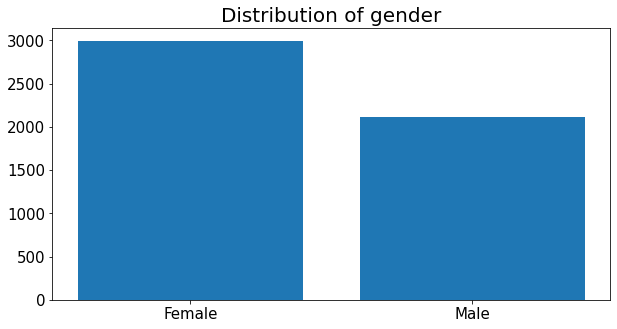

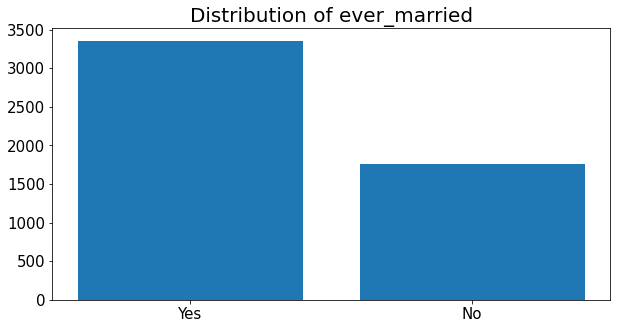

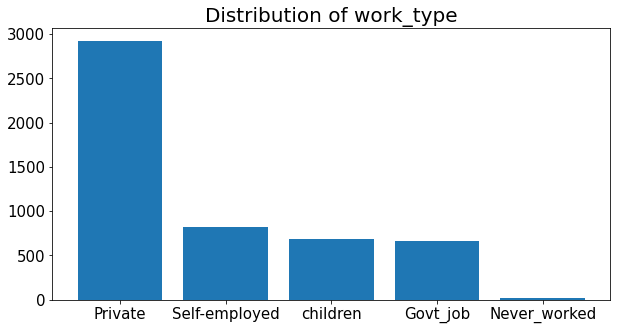

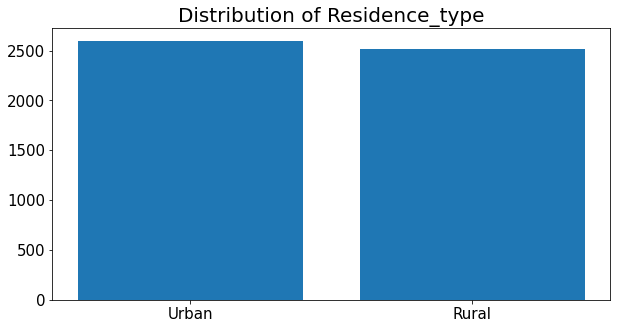

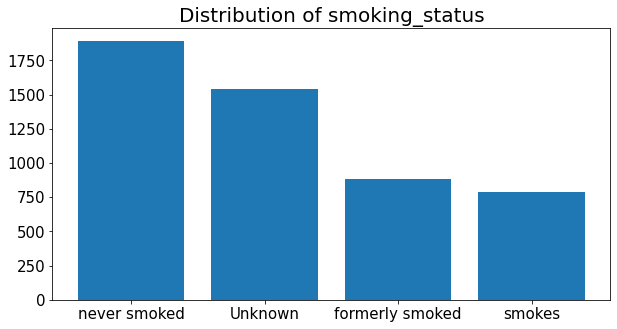

In [13]:
count = 0
row = 1
for x in categorical_columns:
    val1 = stroke_data[x].value_counts().index
    count1 = stroke_data[x].value_counts().values
    plt.figure(count//row, figsize=(10,5))
    plt.subplot(1, row, (count)%row + 1)
    plt.title(f'Distribution of {x}', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.bar(val1, count1);
    count += 1

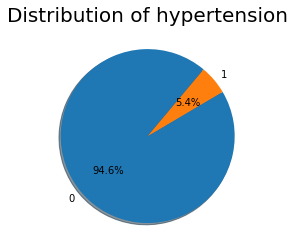

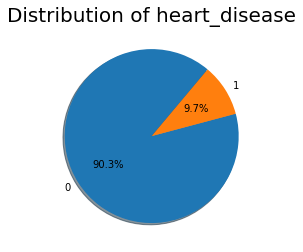

In [14]:
count = 0
row = 1
for x in numeric_categorical_columns:
    stroke_data[x].value_counts().plot.pie(label="", autopct="%1.1f%%", shadow=True, startangle=50)
    plt.figure(count//row)
    plt.subplot(1, row, (count)%row + 1)
    plt.title(f'Distribution of {x}', fontsize=20)
    count += 1

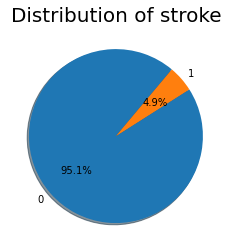

In [15]:
stroke_data["stroke"].value_counts().plot.pie(label="", autopct="%1.1f%%", shadow=True, startangle=50)
plt.title(f'Distribution of stroke', fontsize=20)
plt.show()

Observations:
1. The data is highly unbalanced.
2. Females are more than males.
3. The number of people who are married is way more than unmarried.
4. People prefer to work in private companies while the number of children/govt_job/self_employed seems to be equal. And we have fewer unemployed people.
5. Not a big difference between the population of urban and rural areas.
6. Our data is with an extremely high percentage of people who are not described if they smore or not. It's not a good idea to be deleted them because they are 31% of the data.
7. Data contains only 5% of people with hypertension/stroke and 10% with heart disease

### Continuous columns distribution

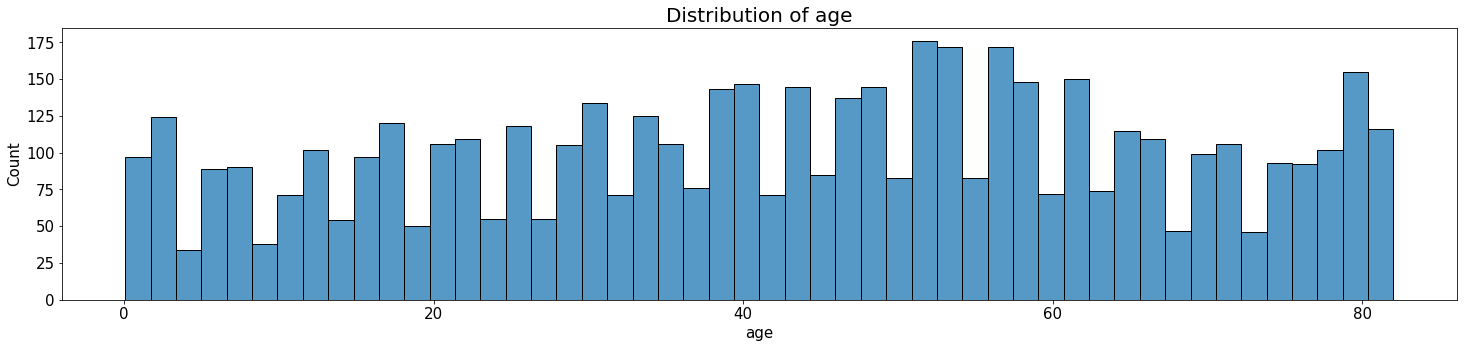

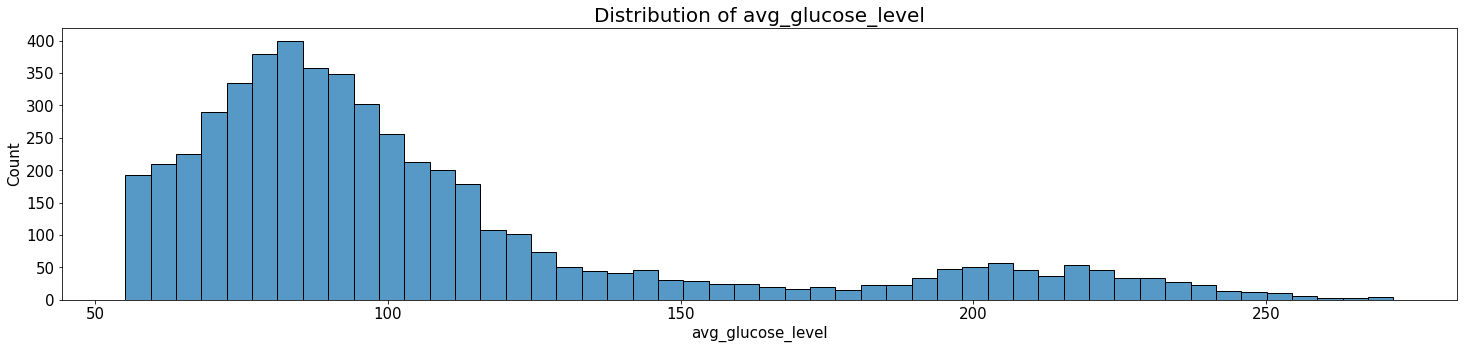

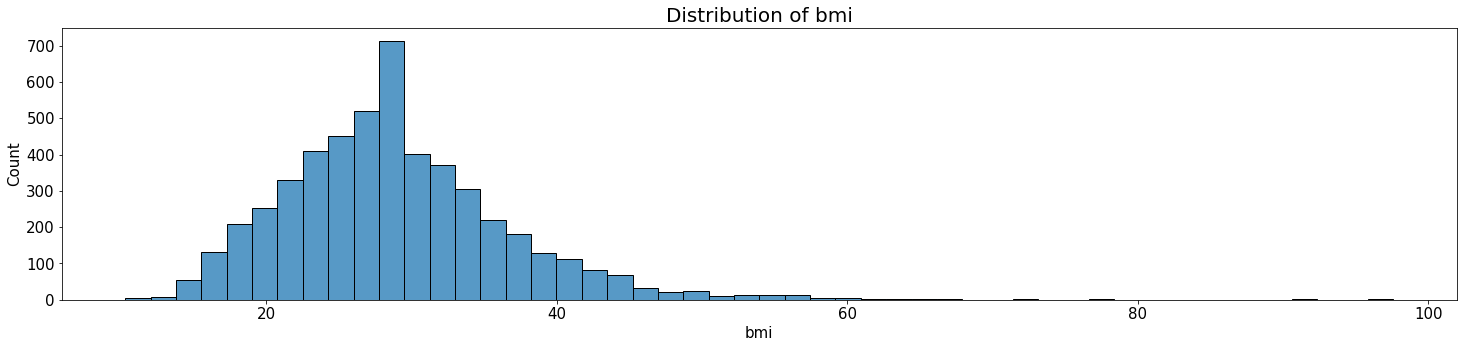

In [16]:
count = 0
row = 1
for x in continuous_columns:
    data = stroke_data[x]
    plt.figure(count//row, figsize=(25,5))
    plt.subplot(1, row, (count)%row + 1)
    plt.title(f'Distribution of {x}', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(x, fontsize=15)
    plt.ylabel('Count', fontsize=15)
    sns.histplot(data, bins = 50);
    count += 1

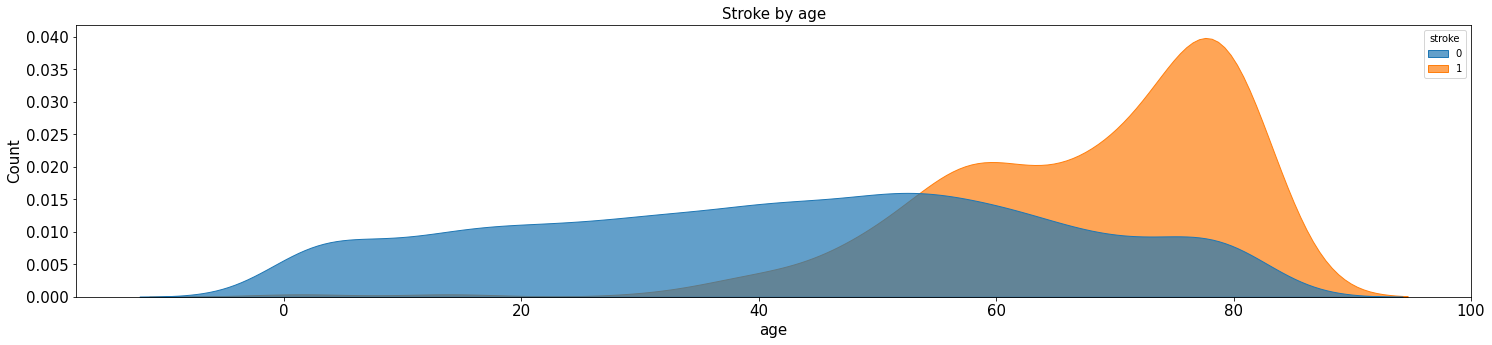

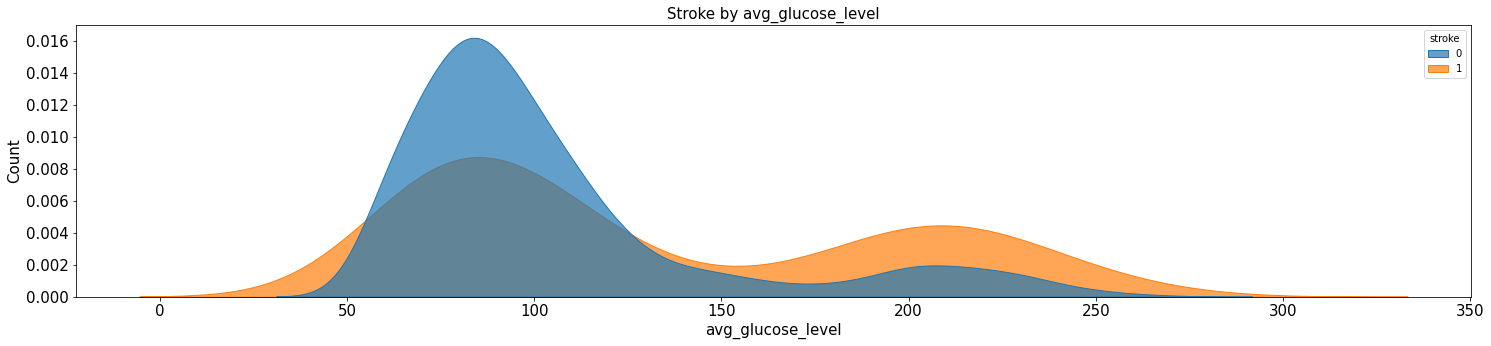

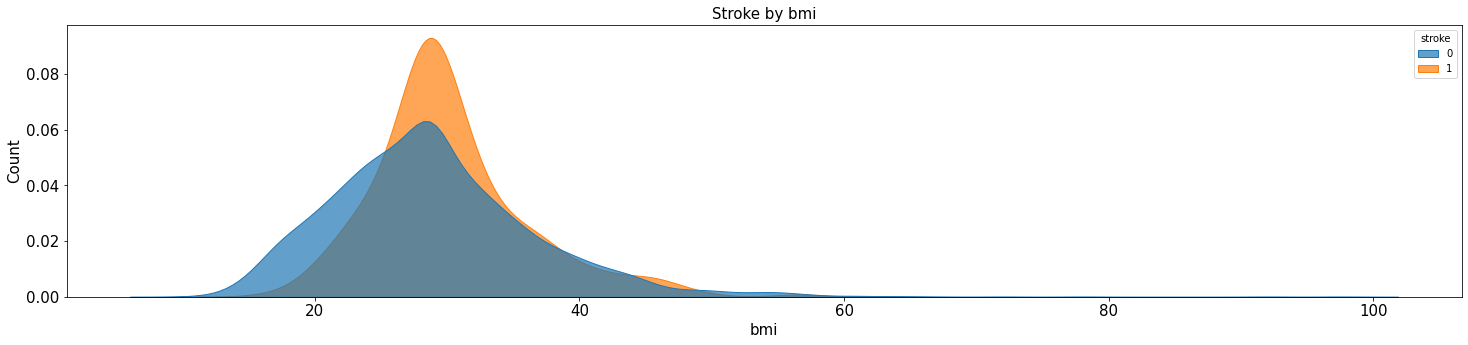

In [17]:
count = 0
row = 1
for x in continuous_columns:
    plt.figure(count//row, figsize=(25,5))
    plt.subplot(1, row, (count)%row + 1)
    plt.title(f'Stroke by {x}', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(x, fontsize=15)
    plt.ylabel('Count', fontsize=15)
    sns.kdeplot(data=stroke_data, x=x, hue="stroke", fill=True, common_norm=False, alpha=.7)
    count += 1

1. Relationship between age and stroke:    
    The older a person is, the higher the chance is likely to have a stroke.
    
    
2. Relationship between Avgerage Glucose level and stroke:    
    No clear relationship between avg_lucose_level and stroke.
    
    
3. Relationship between Body Mass Index(BMI) and stroke:    
    Same for BMI and stroke, no clear path.

## Outliers Detection

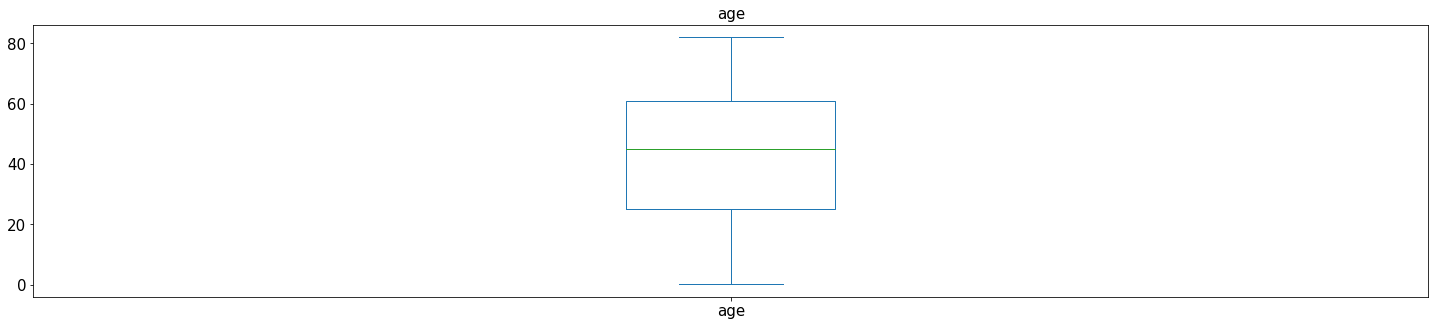

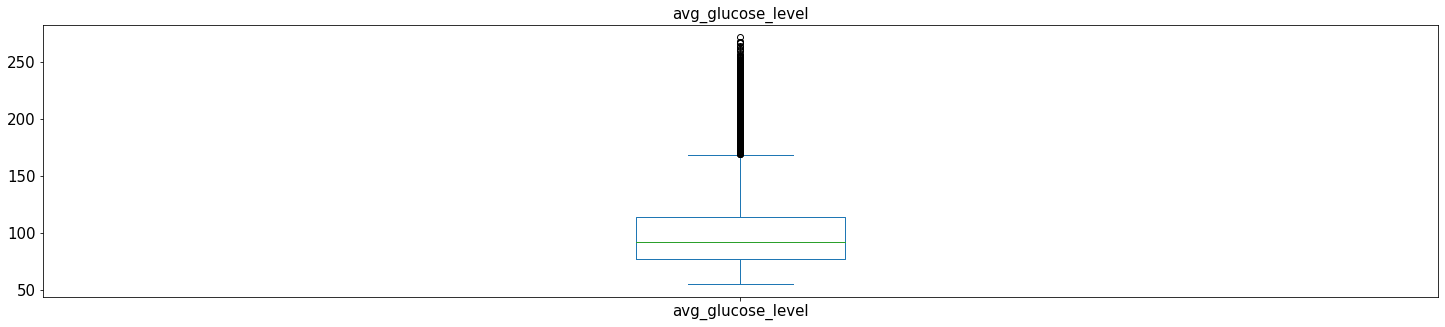

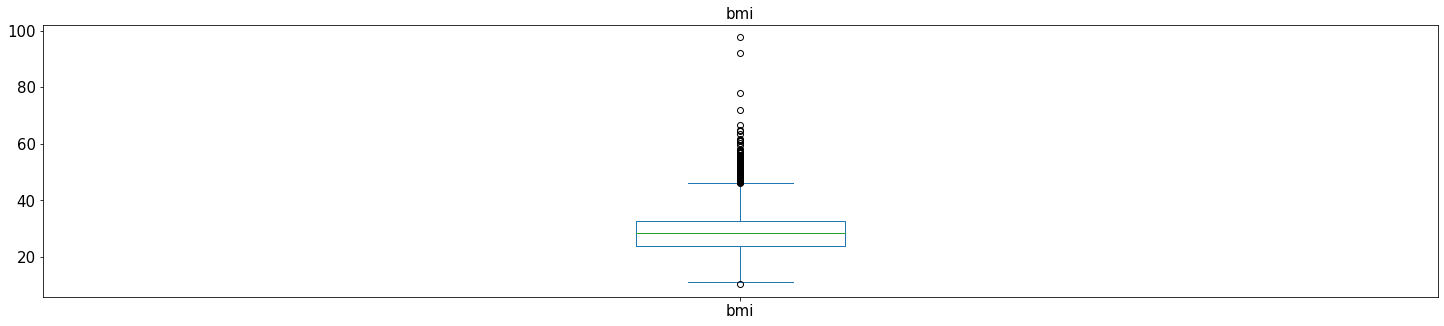

In [18]:
count = 0
row = 1

for x in continuous_columns:
    data = stroke_data[x]
    plt.figure(count//row, figsize=(25,5))
    plt.subplot(1, row, (count)%row + 1)
    plt.title(x, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    data.plot(kind='box')
    count += 1

We see a few outliers in BMI and Avgerage Glucose levels.We'll keep them as they are since there aren't too many.

## Correlations values

<AxesSubplot:>

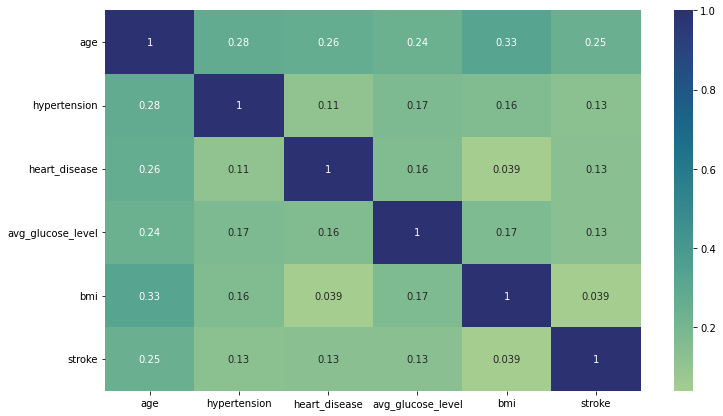

In [19]:
plt.figure(figsize=(12,7))
sns.heatmap(stroke_data.corr(),annot=True, cmap='crest')

1. No strong correlation between our featured.
2. The highest correlation can be observed between Body Mass Index(BMI) and age.
3. Heart disease and hypertension have the weakest correlation.

In [20]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1


## Models

First, we will prepare the data starting with separating the input variables (stroke_features) and output variables (stroke_label).

In [21]:
stroke_features = stroke_data.drop("stroke", axis=1)
stroke_label = stroke_data.stroke

stroke_features

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked
...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked


pd.get_dummies() is used to manipulate data. It transforms categorical information into dummy or indicator variables.

In [22]:
stroke_features = pd.get_dummies(stroke_features)
stroke_features

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.60000,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
51676,61.0,0,0,202.21,28.89456,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
31112,80.0,0,1,105.92,32.50000,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
60182,49.0,0,0,171.23,34.40000,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1665,79.0,1,0,174.12,24.00000,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1,0,83.75,28.89456,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
44873,81.0,0,0,125.20,40.00000,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
19723,35.0,0,0,82.99,30.60000,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0


For our input and output variables, we must divide our data into training and testing sets. I'd like to use 30% of the data for testing.

In [23]:
stroke_features_train, stroke_features_test, stroke_label_train, stroke_label_test = train_test_split(
    stroke_features,stroke_label,test_size = 0.30, random_state = 42
)

print(f"stroke_features_train shape is {stroke_features_train.shape}")
print(f"stroke_features_test shape is {stroke_features_test.shape}")
print(f"stroke_label_train shape is {stroke_label_train.shape}")
print(f"stroke_label_test shape is {stroke_label_test.shape}")

stroke_features_train shape is (3576, 20)
stroke_features_test shape is (1533, 20)
stroke_label_train shape is (3576,)
stroke_label_test shape is (1533,)


### Scaling

In [24]:
scaler = StandardScaler()
stroke_features_train = scaler.fit_transform(stroke_features_train)
stroke_features_test = scaler.fit_transform(stroke_features_test)

In [25]:
model_score = pd.DataFrame(columns= ["Model Name", "Train Score", "Test Score", "Accuracy Score"])

We already saw in the distribution, that we actually have an imbalanced stroke column. So for our f1 scoring, we should use the macro average or weighted average of f1_score. I think the weighted average is a little bit better in this case. We want to assign greater contributions to classes with more examples in the data set.

### Decision Tree

Decision trees are widely used in machine learning for classification and regression. A decision tree is used in decision analysis to visually and explicitly represent decisions and decision-making. It employs a decision-tree model. The Decision Tree algorithm is a supervised learning algorithm that is commonly used to solve classification problems. It applies to both discrete and continuous variables. We divide the population into two or more homogeneous sets using this algorithm. This is done based on the most important characteristics in order to be as distinct as possible. 

In [26]:
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(stroke_features_train, stroke_label_train)

train_score = dtc.score(stroke_features_train, stroke_label_train)
test_score = dtc.score(stroke_features_test, stroke_label_test)

predict_dtc = dtc.predict(stroke_features_test)
accuracy = accuracy_score(stroke_label_test, predict_dtc)
f1 = f1_score(stroke_label_test, predict_dtc, average= "weighted")

new_model = pd.Series({
    "Model Name": "Decision Tree Classifier",
    "Train Score":train_score,
    "Test Score": test_score, 
    "Accuracy Score": accuracy,
    "F1 Score": f1
})
model_score = pd.concat([model_score, new_model.to_frame().T], ignore_index=True)
model_score

,Model Name,Train Score,Test Score,Accuracy Score,F1 Score
0,Decision Tree Classifier,0.956935,0.93803,0.93803,0.911825


### Random Forest

Random forest is another versatile supervised machine learning algorithm that can be used for classification and regression. The term "forest" refers to a collection of uncorrelated decision trees that are then combined to reduce variance and produce more accurate data predictions.The random forest algorithm's 'forest' is trained using bagging or bootstrap aggregation. Bagging is a meta-algorithm that improves the accuracy of machine learning algorithms through an ensemble approach.
The outcome is determined by the (random forest) algorithm based on the predictions of the decision trees. It predicts by averaging or averaging the output of various trees. The precision of the outcome improves as the number of trees increases.

In [27]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=4)
rfc.fit(stroke_features_train, stroke_label_train)

train_score = rfc.score(stroke_features_train, stroke_label_train)
test_score = rfc.score(stroke_features_test, stroke_label_test)

predict_rfc = rfc.predict(stroke_features_test)
accuracy = accuracy_score(stroke_label_test, predict_rfc)
f1 = f1_score(stroke_label_test, predict_rfc, average= "weighted")

new_model = pd.Series({
    "Model Name": "Random Forest Classifier",
    "Train Score":train_score,
    "Test Score": test_score, 
    "Accuracy Score": accuracy,
    "F1 Score": f1
})
model_score = pd.concat([model_score, new_model.to_frame().T], ignore_index=True)
model_score

,Model Name,Train Score,Test Score,Accuracy Score,F1 Score
0,Decision Tree Classifier,0.956935,0.93803,0.93803,0.911825
1,Random Forest Classifier,0.955257,0.941944,0.941944,0.913784


### K-Nearest Neighbors

The KNN algorithm, also known as the K-nearest neighbor algorithm, is a non-parametric algorithm that categorizes data points based on their proximity and association with other available data. This algorithm assumes that data points with similar characteristics can be found nearby. As a result, it attempts to calculate the distance between data points, typically using Euclidean distance, and then assigns a category based on the most frequently occurring category or average. Its ease of use and short calculation time make it a favorite among data scientists but as the test 

In [28]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(stroke_features_train, stroke_label_train)

train_score = knn.score(stroke_features_train, stroke_label_train)
test_score = knn.score(stroke_features_test, stroke_label_test)

predict_knn = knn.predict(stroke_features_test)
accuracy = accuracy_score(stroke_label_test, predict_knn)
f1 = f1_score(stroke_label_test, predict_knn, average= "weighted")

new_model = pd.Series({
    "Model Name": "KNeighbors Classifier",
    "Train Score":train_score,
    "Test Score": test_score, 
    "Accuracy Score": accuracy,
    "F1 Score": f1
})
model_score = pd.concat([model_score, new_model.to_frame().T], ignore_index=True)
model_score

,Model Name,Train Score,Test Score,Accuracy Score,F1 Score
0,Decision Tree Classifier,0.956935,0.93803,0.93803,0.911825
1,Random Forest Classifier,0.955257,0.941944,0.941944,0.913784
2,KNeighbors Classifier,0.957494,0.942596,0.942596,0.918872


### Gaussian Naive Bayes 

The Naive Bayes classification approach employs the Bayes Theorem's principle of class conditional independence. This means that the presence of one feature in the probability of a given outcome has no effect on the presence of another, and each predictor has the same effect on that outcome. While other functions can be used to estimate data distribution, the Gaussian or normal distribution is the most straightforward to implement because you only need to calculate the mean and standard deviation for the training data.

In [29]:
gnb = GaussianNB()
gnb.fit(stroke_features_train, stroke_label_train)

train_score = gnb.score(stroke_features_train, stroke_label_train)
test_score = gnb.score(stroke_features_test, stroke_label_test)

predict_gnb = gnb.predict(stroke_features_test)
accuracy = accuracy_score(stroke_label_test, predict_gnb)
f1 = f1_score(stroke_label_test, predict_gnb, average= "weighted")

new_model = pd.Series({
    "Model Name": "Gaussian Naive Bayes",
    "Train Score":train_score,
    "Test Score": test_score, 
    "Accuracy Score": accuracy,
    "F1 Score": f1
})
model_score = pd.concat([model_score, new_model.to_frame().T], ignore_index=True)
model_score

,Model Name,Train Score,Test Score,Accuracy Score,F1 Score
0,Decision Tree Classifier,0.956935,0.93803,0.93803,0.911825
1,Random Forest Classifier,0.955257,0.941944,0.941944,0.913784
2,KNeighbors Classifier,0.957494,0.942596,0.942596,0.918872
3,Gaussian Naive Bayes,0.319911,0.941944,0.941944,0.913784


### Gaussian Support Vector Machines¶

A support vector machine can be used for data classification as well as regression. However, it is typically used for classification problems, constructing a hyperplane with the greatest distance between two classes of data points. This hyperplane is known as the decision boundary, and it separates the data point classes (for example, oranges vs. apples) on either side of the plane.

Another popular Kernel method used in SVM models is Gaussian RBF (Radial Basis Function). The RBF kernel is a function whose value is proportional to the distance between the origin and some point.

In [30]:
rbf = SVC(kernel='rbf', C=100)
rbf.fit(stroke_features_train, stroke_label_train)

train_score = rbf.score(stroke_features_train, stroke_label_train)
test_score = rbf.score(stroke_features_test, stroke_label_test)

predict_rbf = rbf.predict(stroke_features_test)
accuracy = accuracy_score(stroke_label_test, predict_rbf)
f1 = f1_score(stroke_label_test, predict_rbf, average= "weighted")

new_model = pd.Series({
    "Model Name": "Gaussian Support Vector Machine",
    "Train Score":train_score,
    "Test Score": test_score, 
    "Accuracy Score": accuracy,
    "F1 Score": f1
})
model_score = pd.concat([model_score, new_model.to_frame().T], ignore_index=True)
model_score

,Model Name,Train Score,Test Score,Accuracy Score,F1 Score
0,Decision Tree Classifier,0.956935,0.93803,0.93803,0.911825
1,Random Forest Classifier,0.955257,0.941944,0.941944,0.913784
2,KNeighbors Classifier,0.957494,0.942596,0.942596,0.918872
3,Gaussian Naive Bayes,0.319911,0.941944,0.941944,0.913784
4,Gaussian Support Vector Machine,0.973993,0.926288,0.926288,0.914384


In [31]:
model_score.style.highlight_max(color = "red", axis = 0)

,Model Name,Train Score,Test Score,Accuracy Score,F1 Score
0,Decision Tree Classifier,0.956935,0.938030,0.938030,0.911825
1,Random Forest Classifier,0.955257,0.941944,0.941944,0.913784
2,KNeighbors Classifier,0.957494,0.942596,0.942596,0.918872
3,Gaussian Naive Bayes,0.319911,0.941944,0.941944,0.913784
4,Gaussian Support Vector Machine,0.973993,0.926288,0.926288,0.914384


## Conclusion

Based on the results, the best algorithm for the current task in my opinion is KNeighbors Classifier. As we can see this model shows the best performances with an accuracy score = 0.942596 and an f1 score = 0.918872. The other tested algorithms performed very similarly as well.

## References

1. [Kaggle - Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

2.  [Supervised Learning Models](https://www.ibm.com/cloud/learn/supervised-learning)

3. Boehme, A. K., Esenwa, C., & Elkind, M. S. (2017). Stroke risk factors, genetics, and prevention. Circulation research, 120(3), 472-495.

4. Hardie, K., Hankey, G. J., Jamrozik, K., Broadhurst, R. J., & Anderson, C. (2004). Ten-year risk of first recurrent stroke and disability after first-ever stroke in the Perth Community Stroke Study. Stroke, 35(3), 731-735.

5. Kapral, M., et.al. (2019). Rural-urban differences in stroke risk factors, incidence, and mortality in people with and without prior stroke: The CANHEART stroke study. Circulation: Cardiovascular Quality and Outcomes, 12(2),e004973. 

6. Truelsen, T., Piechowski‐Jóźwiak, B., Bonita, R., Mathers, C., Bogousslavsky, J., & Boysen, G. (2006). Stroke incidence and prevalence in Europe: a review of available data. European journal of neurology, 13(6), 581-598.
